Import the required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Import Dataset

In [3]:
Dataset = pd.read_csv('Data/airlinedelaycauses_DelayedFlights.csv')
Dataset

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
Dataset.dropna(inplace=True)
Dataset.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.247486e+06,1247486.0,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,...,1.247486e+06,1.247486e+06,1.247486e+06,1247486.0,1247486.0,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06
mean,3.319515e+06,2008.0,6.065399e+00,1.572542e+01,3.980082e+00,1.558832e+03,1.487949e+03,1.616749e+03,1.652458e+03,2.276526e+03,...,7.415867e+02,7.297232e+00,2.066033e+01,0.0,0.0,1.917943e+01,3.703355e+00,1.502162e+01,9.013728e-02,2.529649e+01
std,2.079531e+06,0.0,3.508937e+00,8.793008e+00,1.993270e+00,4.543300e+02,4.211782e+02,5.839416e+02,4.617372e+02,1.997547e+03,...,5.593643e+02,6.033239e+00,1.667983e+01,0.0,0.0,4.354624e+01,2.149153e+01,3.383308e+01,2.022716e+00,4.205489e+01
min,4.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.484624e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.232000e+03,1.150000e+03,1.326000e+03,1.340000e+03,6.370000e+02,...,3.340000e+02,4.000000e+00,1.100000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.224052e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.618000e+03,1.529000e+03,1.737000e+03,1.722000e+03,1.589000e+03,...,5.950000e+02,6.000000e+00,1.600000e+01,0.0,0.0,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.921396e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.924000e+03,1.830000e+03,2.048000e+03,2.022000e+03,3.676000e+03,...,9.720000e+02,8.000000e+00,2.400000e+01,0.0,0.0,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009718e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.741000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,0.0,0.0,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


Transform Data

In [19]:
Scaler = StandardScaler()
Dataset[['Month_T', 'DepTime_T', 'ArrTime_T', 'CRSDepTime_T', 'CRSArrTime_T']] = Scaler.fit_transform(Dataset[['Month', 'DepTime', 'ArrTime', 'CRSDepTime', 'CRSArrTime']])
Dataset

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month_T,DepTime_T,ArrTime_T,CRSDepTime_T,CRSArrTime_T,Kmeans_5
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,0.0,0.0,0.0,32.0,-1.443571,0.594652,0.586105,0.634057,0.590254,0
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,0.0,0.0,0.0,47.0,-1.443571,0.832365,0.719680,0.812129,0.622740,0
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,0.0,0.0,0.0,72.0,-1.443571,0.187459,0.390880,0.052355,0.157107,3
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,0.0,0.0,0.0,12.0,-1.443571,-0.235142,0.039818,-0.149460,-0.059466,3
11,18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,...,0.0,0.0,0.0,16.0,-1.443571,-0.519076,-0.155408,-0.553089,-0.308526,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,7009705,2008,12,13,6,921.0,830,1112.0,1008,DL,...,0.0,13.0,0.0,0.0,1.691282,-1.403896,-0.864383,-1.562164,-1.395724,1
1936752,7009709,2008,12,13,6,1552.0,1520,1735.0,1718,DL,...,0.0,0.0,0.0,17.0,1.691282,-0.015037,0.202505,0.076098,0.141947,3
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,0.0,0.0,0.0,22.0,1.691282,-0.679753,0.000430,-0.636190,-0.217565,3
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,57.0,18.0,0.0,0.0,1.691282,-1.984972,-1.220583,-2.108251,-1.956650,1


Identifying optimum number of cluster
(Optional, because if you just use random number. Its fine, but for better result I use this)

In [11]:
# Function optimumm number clusters
def Optimum_K_Means(data, max_k):
    means = []
    inertias = []

    for k in range (1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    
    # Generate Elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

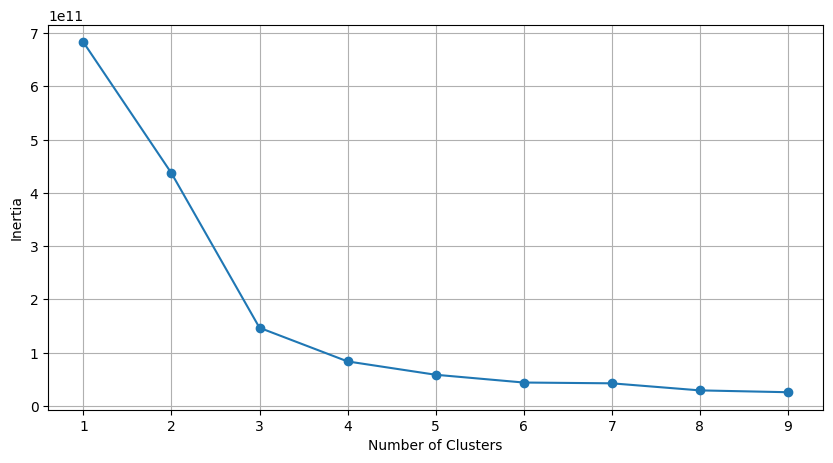

In [12]:
Optimum_K_Means(Dataset[['DepTime', 'ArrTime']], 10)

Applying K-Means Clustering

In [22]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Dataset[['DepTime_T', 'ArrTime_T']])
Dataset['Kmeans_5'] = kmeans.labels_
Dataset

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month_T,DepTime_T,ArrTime_T,CRSDepTime_T,CRSArrTime_T,Kmeans_5
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,0.0,0.0,0.0,32.0,-1.443571,0.594652,0.586105,0.634057,0.590254,1
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,0.0,0.0,0.0,47.0,-1.443571,0.832365,0.719680,0.812129,0.622740,1
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,0.0,0.0,0.0,72.0,-1.443571,0.187459,0.390880,0.052355,0.157107,0
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,0.0,0.0,0.0,12.0,-1.443571,-0.235142,0.039818,-0.149460,-0.059466,0
11,18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,...,0.0,0.0,0.0,16.0,-1.443571,-0.519076,-0.155408,-0.553089,-0.308526,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,7009705,2008,12,13,6,921.0,830,1112.0,1008,DL,...,0.0,13.0,0.0,0.0,1.691282,-1.403896,-0.864383,-1.562164,-1.395724,3
1936752,7009709,2008,12,13,6,1552.0,1520,1735.0,1718,DL,...,0.0,0.0,0.0,17.0,1.691282,-0.015037,0.202505,0.076098,0.141947,0
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,0.0,0.0,0.0,22.0,1.691282,-0.679753,0.000430,-0.636190,-0.217565,4
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,57.0,18.0,0.0,0.0,1.691282,-1.984972,-1.220583,-2.108251,-1.956650,3


Plotting Data

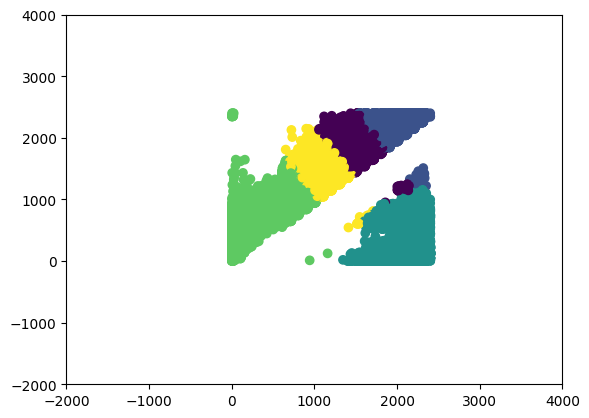

In [23]:
plt.scatter(x=Dataset['DepTime'], y=Dataset['ArrTime'], c=Dataset['Kmeans_5'])
plt.xlim(-2000, 4000)
plt.ylim(-2000, 4000)
plt.show()